# Project Assignment B

## Loading and Cleaning the Data

Load WikiLeaks Afghan War Diary from 2004-2009.

In [1]:
# Pandas contains useful functions for data structures with "relational" or "labeled" data
import pandas

# header as suggested
# by WikiLeaks: https://wikileaks.org/afg/
# by the Guardian: http://www.theguardian.com/world/datablog/2010/jul/25/wikileaks-afghanistan-data
header = [
    'ReportKey', # find messages and also to reference them
    'DateOccurred', 'EventType', 
    'Category', # describes what kind of event the message is about
    'TrackingNumber', 'Title', # internal tracking number and title
    'Summary', # actual description of the event
    'Region', # broader region of the event.
    'AttackOn', # who was attacked during an event
    'ComplexAttack', #  signifies that an attack was a larger operation that required more planning, coordination and preparatio
    'ReportingUnit', 'UnitName', 'TypeOfUnit', # information on the military unit that authored the report
    'FriendlyWounded', 'FriendlyKilled', 'HostNationWounded', 'HostNationKilled', 'CivilianWounded', 'CivilianKilled', 
    'EnemyWounded', 'EnemyKilled', 'EnemyDetained', # who was killed/wounded/captured
    'MilitaryGridReferenceSystem', 'Latitude', 'Longitude', # location
    'OriginatorGroup', 'UpdatedByGroup', # message originated from or was updated by
    'CommandersCriticalInformationRequirements', 
    'Significant', # are analyzed and evaluated by special group in command centre
    'Affiliation', # event was of friendly, neutral or enemy nature
    'DisplayColor', # enemy activity - RED, friendly activity - BLUE, friend on friend - GREEN
    'ClassificationLevel' # classification level of the message, e.g.: Secret
]

data = pandas.read_csv('../../../data/afg.csv', header=None, names=header)
data.head()

,ReportKey,DateOccurred,EventType,Category,TrackingNumber,Title,Summary,Region,AttackOn,ComplexAttack,...,MilitaryGridReferenceSystem,Latitude,Longitude,OriginatorGroup,UpdatedByGroup,CommandersCriticalInformationRequirements,Significant,Affiliation,DisplayColor,ClassificationLevel
0,D92871CA-D217-4124-B8FB-89B9A2CFFCB4,2004-01-01 00:00:00,Enemy Action,Direct Fire,2007-033-004042-0756,DIRECT FIRE Other,KAF-1BDE -S3 REPORTS: SUMMIT 09 B CO ELEMENT S...,RC EAST,ENEMY,False,...,42SWB3900916257,32.683319,69.416107,UNKNOWN,UNKNOWN,NaN,NaN,ENEMY,RED,SECRET
1,C592135C-1BFF-4AEC-B469-0A495FDA78D9,2004-01-01 00:00:00,Friendly Action,Cache Found/Cleared,2007-033-004738-0185,CACHE FOUND/CLEARED Other,USSF FINDS CACHE IN VILLAGE OF WALU TANGAY: US...,RC EAST,FRIEND,False,...,42SXD7520076792,35.018608,70.920273,UNKNOWN,UNKNOWN,NaN,NaN,FRIEND,BLUE,SECRET
2,D50F59F0-6F32-4E63-BC02-DB2B8422DE6E,2004-01-01 00:00:00,Non-Combat Event,Propaganda,2007-033-010818-0798,PROPAGANDA Other,(M) NIGHT LETTERS DISTRIBUTED AROUND HAZARJUFT...,RC SOUTH,NEUTRAL,False,...,41RPQ1439743120,31.116390,64.199707,UNKNOWN,UNKNOWN,NaN,NaN,NEUTRAL,GREEN,SECRET
3,E3F22EFB-F0CA-4821-9322-CC2250C05C8A,2004-01-01 00:00:00,Enemy Action,Direct Fire,2007-033-004042-0850,DIRECT FIRE Other,KAF-1BDE -S3: SUMMIT 6 REPORTS TIC SALUTE TO F...,RC EAST,ENEMY,False,...,42SWB3399911991,32.645000,69.362511,UNKNOWN,UNKNOWN,NaN,NaN,ENEMY,RED,SECRET
4,4D0E1E60-9535-4D58-A374-74367F058788,2004-01-01 00:00:00,Friendly Action,Cache Found/Cleared,2007-033-004738-0279,CACHE FOUND/CLEARED Other,KAF-1BDE -S3 REPORTS: GERONIMO 11 SALUTE AS FO...,RC EAST,FRIEND,False,...,42SWB7580277789,33.236389,69.813606,UNKNOWN,UNKNOWN,NaN,NaN,FRIEND,BLUE,SECRET


We start by doing a small exploratory analysis of the data. We extract the number of rows, columns, the years in which the incidents took place, the number of categories and the most and least commonly occurring categories.

In [2]:

#data['Year'] = [int(date.split("-")[0]) for date in data['DateOccurred']]
data['DateOccurred'] = pandas.to_datetime(data['DateOccurred'])

data['Year'] = [date.year for date in data['DateOccurred']]
data['Hour'] = [date.hour for date in data['DateOccurred']]

#Number of rows/columns
print "Number of rows: %d" % data.shape[0]
print "Number of columns: %d" % data.shape[1]

date_range = set()
for date in data['DateOccurred']:
    date_range.add(date.year)

print "\nYears:\n"
print list(date_range)

#Ocurrences of categories
print "\nNumber of unique categories: %d" %len(set(data['Category']))

#Distribution of categoriesn_occurrences[0:20]
n_occurrences = data['Category'].value_counts()

print "\nMost commonly occurring categories of crime:\n"
print n_occurrences.head()

print "\nMost commonly occurring category of crime is %s with %d" % (n_occurrences.argmax(), n_occurrences.max())
print "\nLeast commonly occurring category of crime is %s with %d" % (n_occurrences.argmin(), n_occurrences.min())


Number of rows: 76911
Number of columns: 34

Years:

[2004, 2005, 2006, 2007, 2008, 2009]

Number of unique categories: 168

Most commonly occurring categories of crime:

Direct Fire          16293
IED Found/Cleared     8581
Indirect Fire         7237
IED Explosion         7202
Other                 4005
dtype: int64

Most commonly occurring category of crime is Direct Fire with 16293

Least commonly occurring category of crime is Security Breach with 1


## Casualties recorded by the Afghanistan database

Four groups: 
    * Afghan forces
    * Nato Forces
    * Taliban
    * Civilians
    
We count the number of people wounded and killed in each group and plot it in a grouped barchart in which we can toggle between wounded and killed data.

In [3]:
#create new dataframe with the columns of interest

db = pandas.concat([data['Year'],data['HostNationWounded'], data['HostNationKilled'],
              data['EnemyWounded'], data['EnemyKilled'],
              data['CivilianWounded'], data['CivilianKilled'],
              data['FriendlyWounded'], data['FriendlyKilled']]
              , axis=1)
db.head()

,Year,HostNationWounded,HostNationKilled,EnemyWounded,EnemyKilled,CivilianWounded,CivilianKilled,FriendlyWounded,FriendlyKilled
0,2004,0,0,0,3,0,0,0,0
1,2004,0,0,0,0,0,0,0,0
2,2004,0,0,0,0,0,0,0,0
3,2004,0,0,0,8,0,0,0,0
4,2004,0,0,0,0,0,0,0,0


In [4]:
casualties = {}

for date in date_range:
    #filter dataframe by year
    db_year = db[db['Year'] == date]
    casualties[str(date)]= {}
    for column in db.columns:
        if column != 'Year':
            #sum every column except 'year' and store it in a dictionary with 'years' as keys
            casualties[str(date)][column] = db_year[column].sum()

In [5]:
for key in sorted(casualties.iterkeys()):
    print "%s: %s" % (key, casualties[key])

2004: {'HostNationKilled': 218.0, 'FriendlyWounded': 133.0, 'HostNationWounded': 316.0, 'EnemyWounded': 93.0, 'FriendlyKilled': 22.0, 'EnemyKilled': 343.0, 'CivilianKilled': 219.0, 'CivilianWounded': 208.0}
2005: {'HostNationKilled': 180.0, 'FriendlyWounded': 480.0, 'HostNationWounded': 504.0, 'EnemyWounded': 200.0, 'FriendlyKilled': 71.0, 'EnemyKilled': 890.0, 'CivilianKilled': 178.0, 'CivilianWounded': 454.0}
2006: {'HostNationKilled': 605.0, 'FriendlyWounded': 1083.0, 'HostNationWounded': 1397.0, 'EnemyWounded': 252.0, 'FriendlyKilled': 142.0, 'EnemyKilled': 2689.0, 'CivilianKilled': 800.0, 'CivilianWounded': 1794.0}
2007: {'HostNationKilled': 951.0, 'FriendlyWounded': 1652.0, 'HostNationWounded': 2093.0, 'EnemyWounded': 377.0, 'FriendlyKilled': 186.0, 'EnemyKilled': 4044.0, 'CivilianKilled': 758.0, 'CivilianWounded': 1962.0}
2008: {'HostNationKilled': 699.0, 'FriendlyWounded': 1255.0, 'HostNationWounded': 1749.0, 'EnemyWounded': 285.0, 'FriendlyKilled': 244.0, 'EnemyKilled': 2816.0

In [6]:
#Extract wounded data and rename columns

Wounded = {}
for date in date_range:
    
    Wounded[str(date)]= {}
    
    Wounded[str(date)]['Afghan forces'] = casualties[str(date)]['HostNationWounded']
    Wounded[str(date)]['Taliban'] = casualties[str(date)]['EnemyWounded']
    Wounded[str(date)]['Civilians'] = casualties[str(date)]['CivilianWounded']
    Wounded[str(date)]['Nato forces'] = casualties[str(date)]['FriendlyWounded']
    

In [7]:
for key in sorted(Wounded.iterkeys()):
    print "%s: %s" % (key, Wounded[key])

2004: {'Afghan forces': 316.0, 'Nato forces': 133.0, 'Taliban': 93.0, 'Civilians': 208.0}
2005: {'Afghan forces': 504.0, 'Nato forces': 480.0, 'Taliban': 200.0, 'Civilians': 454.0}
2006: {'Afghan forces': 1397.0, 'Nato forces': 1083.0, 'Taliban': 252.0, 'Civilians': 1794.0}
2007: {'Afghan forces': 2093.0, 'Nato forces': 1652.0, 'Taliban': 377.0, 'Civilians': 1962.0}
2008: {'Afghan forces': 1749.0, 'Nato forces': 1255.0, 'Taliban': 285.0, 'Civilians': 1980.0}
2009: {'Afghan forces': 2444.0, 'Nato forces': 2693.0, 'Taliban': 617.0, 'Civilians': 2646.0}


In [8]:
##writing wounded data to a dataframe for visualizing it with D3

data_wounded = pandas.DataFrame()

data_wounded['Year'] = [key for key in sorted(Wounded.iterkeys())]
data_wounded['Afghan forces'] = [Wounded[key]['Afghan forces'] for key in sorted(Wounded.iterkeys())]
data_wounded['Nato forces'] = [Wounded[key]['Nato forces'] for key in sorted(Wounded.iterkeys())]
data_wounded['Taliban'] = [Wounded[key]['Taliban'] for key in sorted(Wounded.iterkeys())]
data_wounded['Civilians'] = [Wounded[key]['Civilians'] for key in sorted(Wounded.iterkeys())]

data_wounded

,Year,Afghan forces,Nato forces,Taliban,Civilians
0,2004,316,133,93,208
1,2005,504,480,200,454
2,2006,1397,1083,252,1794
3,2007,2093,1652,377,1962
4,2008,1749,1255,285,1980
5,2009,2444,2693,617,2646


In [9]:
#save wounded data to csv
data_wounded.to_csv('../../../data/Wounded', sep=',', index=False)

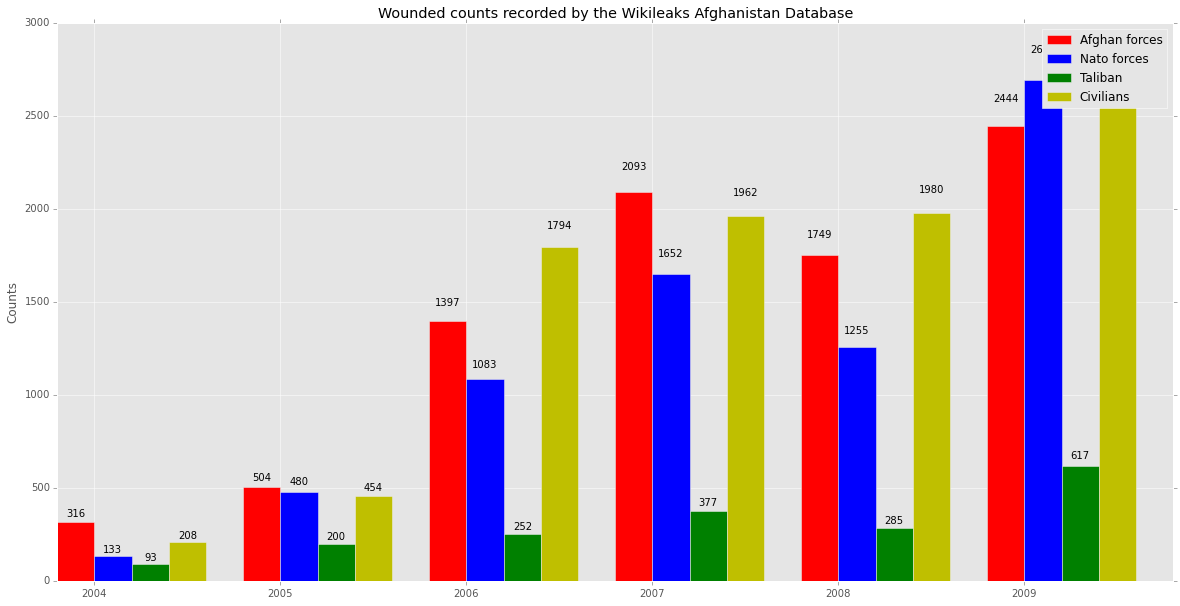

In [10]:
#multi bar plot of killed
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.2     # the width of the bars

Afghan_forces = list(data_wounded['Afghan forces'])
Nato_forces = list(data_wounded['Nato forces'])
Taliban = list(data_wounded['Taliban'])
Civilians = list(data_wounded['Civilians'])

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind, Afghan_forces, width, color='r')
rects2 = ax.bar(ind + width, Nato_forces, width, color='b')
rects3 = ax.bar(ind + width*2, Taliban, width, color='g')
rects4 = ax.bar(ind + width*3, Civilians, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Wounded counts recorded by the Wikileaks Afghanistan Database')
ax.set_xticks(ind + width)
ax.set_xticklabels(('2004', '2005', '2006', '2007', '2008', '2009'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Afghan forces', 'Nato forces', 'Taliban', 'Civilians'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()


In [11]:
#Extract killed data and rename columns

Killed = {}
for date in date_range:
    
    Killed[str(date)]= {}
    
    Killed[str(date)]['Afghan forces'] = casualties[str(date)]['HostNationKilled']
    Killed[str(date)]['Taliban'] = casualties[str(date)]['EnemyKilled']
    Killed[str(date)]['Civilians'] = casualties[str(date)]['CivilianKilled']
    Killed[str(date)]['Nato forces'] = casualties[str(date)]['FriendlyKilled']
    

In [12]:
for key in sorted(Killed.iterkeys()):
    print "%s: %s" % (key, Killed[key])

2004: {'Afghan forces': 218.0, 'Nato forces': 22.0, 'Taliban': 343.0, 'Civilians': 219.0}
2005: {'Afghan forces': 180.0, 'Nato forces': 71.0, 'Taliban': 890.0, 'Civilians': 178.0}
2006: {'Afghan forces': 605.0, 'Nato forces': 142.0, 'Taliban': 2689.0, 'Civilians': 800.0}
2007: {'Afghan forces': 951.0, 'Nato forces': 186.0, 'Taliban': 4044.0, 'Civilians': 758.0}
2008: {'Afghan forces': 699.0, 'Nato forces': 244.0, 'Taliban': 2816.0, 'Civilians': 798.0}
2009: {'Afghan forces': 1143.0, 'Nato forces': 481.0, 'Taliban': 4437.0, 'Civilians': 1241.0}


In [13]:
##writing killed data to a dataframe for visualizing it with D3

data_killed = pandas.DataFrame()

data_killed['Year'] = [key for key in sorted(Killed.iterkeys())]
data_killed['Afghan forces'] = [Killed[key]['Afghan forces'] for key in sorted(Killed.iterkeys())]
data_killed['Nato forces'] = [Killed[key]['Nato forces'] for key in sorted(Killed.iterkeys())]
data_killed['Taliban'] = [Killed[key]['Taliban'] for key in sorted(Killed.iterkeys())]
data_killed['Civilians'] = [Killed[key]['Civilians'] for key in sorted(Killed.iterkeys())]

data_killed

,Year,Afghan forces,Nato forces,Taliban,Civilians
0,2004,218,22,343,219
1,2005,180,71,890,178
2,2006,605,142,2689,800
3,2007,951,186,4044,758
4,2008,699,244,2816,798
5,2009,1143,481,4437,1241


In [14]:
#save killed data to csv
data_killed.to_csv('../../../data/Killed', sep=',', index=False)

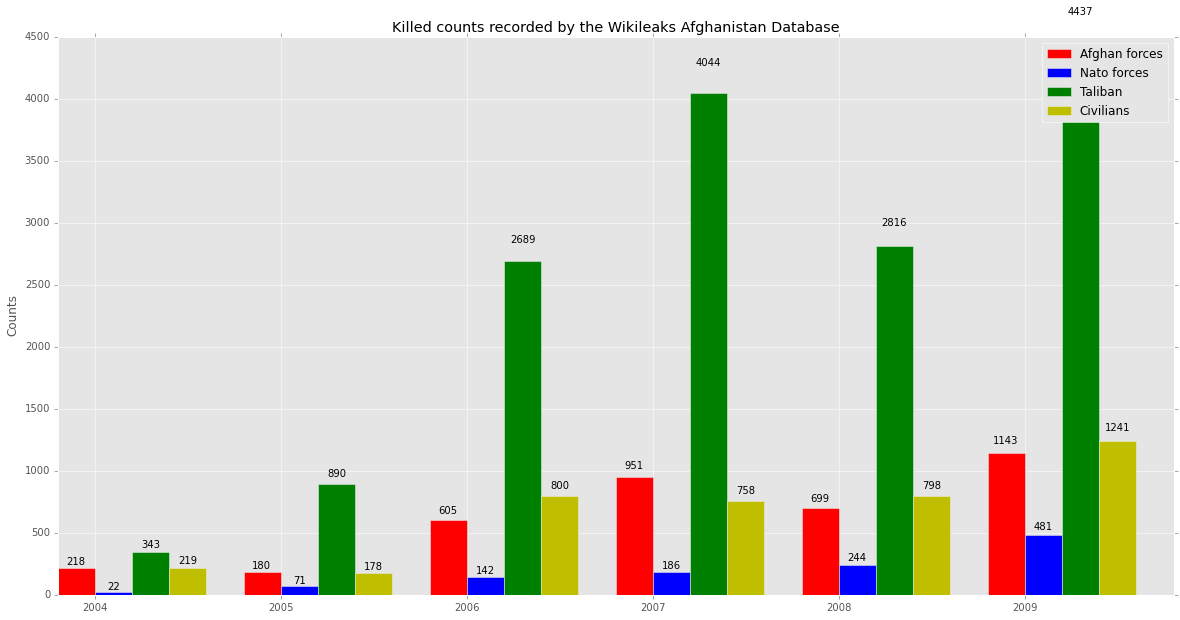

In [15]:
Afghan_forces = list(data_killed['Afghan forces'])
Nato_forces = list(data_killed['Nato forces'])
Taliban = list(data_killed['Taliban'])
Civilians = list(data_killed['Civilians'])

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind, Afghan_forces, width, color='r')
rects2 = ax.bar(ind + width, Nato_forces, width, color='b')
rects3 = ax.bar(ind + width*2, Taliban, width, color='g')
rects4 = ax.bar(ind + width*3, Civilians, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Killed counts recorded by the Wikileaks Afghanistan Database')
ax.set_xticks(ind + width)
ax.set_xticklabels(('2004', '2005', '2006', '2007', '2008', '2009'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Afghan forces', 'Nato forces', 'Taliban', 'Civilians'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

## WordClouds

In this section we use a simple weighting scheme called TF-IDF to find important words within each category. Once we have found them, we visualize them in a word cloud. It is important to note that before starting to find important words, we need to replace all the military acronyms in the descriptions by their meaning in order to have extended and more understandable descriptions.

In [16]:
import bs4
from bs4 import BeautifulSoup
import urllib2

#Replace military language in the description (abbreviations and acronyms that help each other tell exactly
#what they need) by the glossary. We use this glossary in order to create wordclouds.

#read url with the glossary of the acronyms
url = 'http://www.theguardian.com/world/datablog/2010/jul/25/wikileaks-afghanistan-war-logs-glossary'
#read url
html = urllib2.urlopen(url).read()
soup = BeautifulSoup(html)
#find the table where the acronyms are matched to their correspondent meaning
table = soup.find("table")

acronym = []
meaning = []

for row in table.findAll("tr"):
    cells = row.findAll("td")
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 2:
        acronym.append(cells[0].find(text=True).rstrip())
        meaning.append(cells[1].find(text=True).rstrip())

#building dictionary
map_shortcuts = {}

#create a dictionary with acronyms as keys and meanings as values
for index in range(len(acronym)):
    map_shortcuts[acronym[index]] = meaning[index]

In [17]:
import operator
#print 10 first keys and values of the dictionary
sorted(map_shortcuts.items(), key=operator.itemgetter(1))[:10]

[(u'C/S', u' Call sign'),
 (u'L:', u' Location (in relation to S, A, L, T)'),
 (u'OBJ', u' Objective'),
 (u'BSN', u'(Camp) Bastion'),
 (u'cgbg 1 coy', u'1 company, Coldstream Guards battle group'),
 (u'GBU-31', u'2,000lb "smart bomb\''),
 (u'42 CDO RM', u'42 Commando Royal Marines'),
 (u'GBU-12', u'500lb laser-guided "smart bomb"'),
 (u'508 STB', u'508th special troops battalion'),
 (u'81', u'81mm mortar round')]

In [18]:
#Since we have 165 categories and computing a wordcloud for each category is not feasible, we just pick some of the 
#categories we want to compute the wordclouds of.

#indices of categories we are going to compute wordclouds of
indices = [66,68,80,82,100,102]

#get categories names
categ = [n_occurrences.index[idx] for idx in indices]

#filter the dataset. Only keep those rows with the categories selected
db_wc = data[data['Category'].isin(categ)]


In [19]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

#We replace each word in the acronyms description by their meaning. Therefore, we get an extended description.

def matchwords(words):

    text = []

    for word in words:
        if word in map_shortcuts:
            text.append(word.replace(word, map_shortcuts[word]))
        else:
            text.append(word)
            
    return ' '.join(text)

In [20]:
#remove rows with nans in summary
db_wc_filt = db_wc[db_wc['Summary'].notnull()]

#get indices of the filtered dataframe
indices = [index for index in db_wc_filt.index]

long_summary = []
for row in indices:
    #tokenize words in the summary
    words = tokenizer.tokenize(db_wc_filt['Summary'][row])
    #match acronyms to meanings and generate an extended summary
    long_summary.append(matchwords(words))

In [21]:
#create column with extended summary
db_wc_filt.insert(7, 'Extended Summary', long_summary)

In [22]:
db_wc_filt.head()

,ReportKey,DateOccurred,EventType,Category,TrackingNumber,Title,Summary,Extended Summary,Region,AttackOn,...,Longitude,OriginatorGroup,UpdatedByGroup,CommandersCriticalInformationRequirements,Significant,Affiliation,DisplayColor,ClassificationLevel,Year,Hour
4697,971D1398-26F6-42A7-82C7-A03E16E95FA7,2007-02-17 14:43:00,Criminal Event,Carjacking,2007-048-144324-0833,"Second Maersk Line Driver, Truck, and Shipment...","FROM: OPERATIONS OFFICER, AFGHAN DET - 831st ...",FROM OPERATIONS OFFICER AFGHAN DET 831st TRANP...,UNKNOWN,ENEMY,...,70.628479,UNKNOWN,UNKNOWN,NaN,NaN,ENEMY,RED,SECRET,2007,14
6301,D995545F-592A-49F1-8B8D-1131B45C50F6,2006-01-30 22:31:00,Criminal Event,Carjacking,2007-033-004219-0104,300828Z Criminal Event LN report TF Phoenix,(UNCONFIRMED REPORT) LN reported to TF Phoenix...,UNCONFIRMED REPORT Local national reported to ...,RC WEST,ENEMY,...,64.011124,UNKNOWN,UNKNOWN,NaN,NaN,ENEMY,RED,SECRET,2006,22
11260,E3B84BAD-7AF0-4F73-AA13-165612C20848,2007-04-01 09:27:00,Non-Combat Event,Natural Disaster,2007-091-092933-0405,D6 010927ZAPR07 TF Cincinnatus Reports Natural...,Initial Report: At 010927ZAPR07 Bamyan PRT not...,Initial Report At 010927ZAPR07 Bamyan Provinci...,RC EAST,NEUTRAL,...,67.245644,UNKNOWN,UNKNOWN,NaN,NaN,NEUTRAL,GREEN,SECRET,2007,9
17324,F0076CEB-9114-4BDF-917E-61E6343825E1,2007-02-08 15:30:00,Criminal Event,Carjacking,2007-040-134513-0505,081530Z Hijacking of Supply Trucks in PAK,1. Category: 2\n\n \n\n2. TYPE OF IN...,1 Category 2 2 TYPE OF INCIDENT Three Addition...,RC EAST,ENEMY,...,71.067284,UNKNOWN,UNKNOWN,NaN,NaN,ENEMY,RED,SECRET,2007,15
17379,910B9A6D-5680-480C-A2AF-A7D802A9E915,2007-02-10 00:00:00,Non-Combat Event,Natural Disaster,2007-042-071612-0929,"10FEB TF Phoenix Rock Slide (No injuries, Rout...",On 10FEB07 TF Phoenix reported a rock slide bl...,On 10FEB07 Task force Phoenix reported a rock ...,RC CAPITAL,NEUTRAL,...,69.402046,UNKNOWN,UNKNOWN,NaN,NaN,NEUTRAL,GREEN,SECRET,2007,0


For computing the tf-idf weights for each document in the corpus, it is required in the corpus a series of steps:
* Tokenize the corpus
* Model the vector space
* Compute the tf-idf weight for each document in the corpus

We start by building the corpus for each document. 

In [23]:
branch_corpus = {}
for cat in categ:
    d = db_wc_filt[db_wc_filt['Category'] == cat]
    #for each category, join all text from the extended summary and save it in a dictionary
    branch_corpus[cat] = ' '.join(d['Extended Summary'])

In [24]:
import math
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#load english stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
#create a WordNetLemmatizer for stemming the tokens
wordnet_lemmatizer = WordNetLemmatizer() 

#compute number of times a word appears in a document
def freq(word, doc):
    return doc.count(word)

#get number of words in the document
def word_count(doc):
    return len(doc)

#compute TF
def tf(word, doc):
    return (freq(word, doc) / float(word_count(doc)))

#compute number of documents containing a particular word
def num_docs_containing(word, list_of_docs):
    count = 0
    for document in list_of_docs:
        if freq(word, document) > 0:
            count += 1
    return 1 + count


#compute IDF
def idf(word, list_of_docs):
    return math.log(len(list_of_docs) /
            float(num_docs_containing(word, list_of_docs)))

#compute TF-IDF
def tf_idf(word, doc, list_of_docs):
    return (tf(word, doc) * idf(word, list_of_docs))


vocabulary = []
docs = {}

for key,text in branch_corpus.iteritems():
        #tokenize text for a particular category
        tokens = nltk.word_tokenize(text)
        #lower case the words
        tokens = [token.lower() for token in tokens]
        #only keep words, disregard digits
        tokens = [token for token in tokens if token.isalpha()]
        #disregard stopwords and words that are less than 2 letter in length
        tokens = [token for token in tokens if token not in stopwords and len(token) > 2]
        final_tokens = []
        final_tokens.extend(tokens)
        
        docs[key] = {'tf': {}, 'idf': {},
                        'tf-idf': {}, 'tokens': []}
        #compute TF 
        for token in final_tokens:
            #The term-frequency (Normalized Frequency)
            docs[key]['tf'][token] = tf(token, final_tokens)
            docs[key]['tokens'] = final_tokens
        vocabulary.append(final_tokens)

#Compute IDF and TF-IDF
for doc in docs:
    for token in docs[doc]['tf']:
        #The Inverse-Document-Frequency
        docs[doc]['idf'][token] = idf(token, vocabulary)
        #The tf-idf
        docs[doc]['tf-idf'][token] = tf_idf(token, docs[doc]['tokens'], vocabulary)


In [25]:
#get the 10 words with highest TF-IDF score for category 'Hard Landing'
sorted_dic = sorted(docs['Arrest']['tf-idf'].items(), key=operator.itemgetter(1), reverse=True)
sorted_dic[0:10]

[(u'arrested', 0.009088038866306866),
 (u'seized', 0.005450238143640517),
 (u'arrest', 0.004282329970003263),
 (u'detained', 0.004175585425059912),
 (u'rel', 0.0027251190718202583),
 (u'son', 0.002701849392685825),
 (u'house', 0.002701849392685825),
 (u'suspects', 0.0024562267206234773),
 (u'suspicious', 0.002335816347274507),
 (u'mines', 0.002335816347274507)]

In [26]:
#So that we can create the wordclouds we need to round the tf-idf to the nearest integer value. Then we combine 
#all words together in one long string separated by spaces repeating each word to its rounded tf-idf score. 
#Note: We not only round but we scale them by a factor of 100 since we get very low tf-idf values.

for cat in categ:
    for tup in docs[cat]['tf-idf'].items():
        #scale each tf-idf value by a factor of 1000 and round it
        docs[cat]['tf-idf'][tup[0]] = int(round(tup[1]*1000))

In [27]:
#see how they have been scaled and rounded
sorted_dic = sorted(docs['Arrest']['tf-idf'].items(), key=operator.itemgetter(1), reverse=True)
sorted_dic[0:10]

[(u'arrested', 9),
 (u'seized', 5),
 (u'arrest', 4),
 (u'detained', 4),
 (u'rel', 3),
 (u'son', 3),
 (u'house', 3),
 (u'detention', 2),
 (u'capture', 2),
 (u'boorhamodin', 2)]

In [28]:
#generate text for wordclouds
doc_wordcloud = {}

for cat in categ:
    string = []
    for tup in docs[cat]['tf-idf'].items():
        if tup[1] > 0:
            #repeat each word to its scaled and rounded tf-idf score
            string.extend(np.repeat(tup[0],tup[1]))
            
    doc_wordcloud[cat] = ' '.join(string)


#### Natural Disaster ####


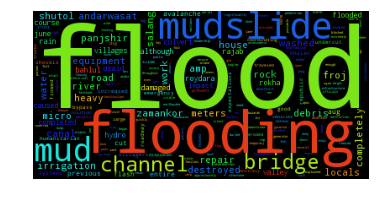

#### Arrest ####


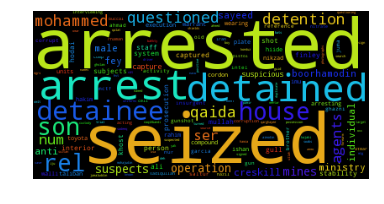

#### Carjacking ####


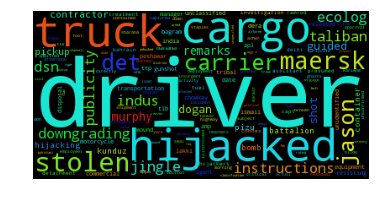

#### Green-Green ####


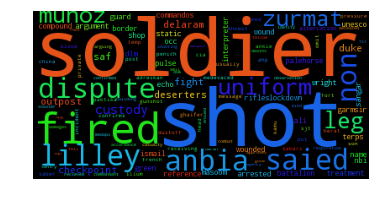

#### Downed Aircraft ####


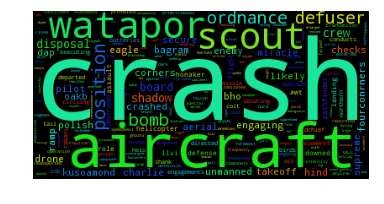

#### Refugees ####


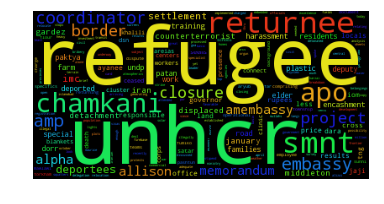

In [29]:
from wordcloud import WordCloud

#generate wordclouds
for cat in categ:
    print "#### %s ####" % cat
    wordcloud = WordCloud().generate(doc_wordcloud[cat])
    img=plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [30]:
#Save wordclouds to files so that we can read them in js for visualizing with D3
def savefile(category):
    filename = '../../../data/' + category
    with open(filename, "w") as text_file:
        text_file.write(doc_wordcloud[category])

for cat in categ:
    savefile(cat)

# LDA

In this section we use Latent Dirichlet Allocation (LDA) which is a topic model which generates topics based on word frequency from a set of documents. 

We consider each extended description in our data set as a document. We do data cleaning on it since it is crucial in order to generate a useful topic model. After the cleaning of the data, we need to generate the LDA model. In order to do that we need to understand how frequently each term occurs within each document. We do that by constructing a document-term matrix (bag of words) with a package called gensim. Once we have constructed the bag of words we are ready to generate and LDA model.

In [31]:
import logging, gensim, bz2
from gensim import corpora, models, similarities
import os
import logging
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import lxml.html

In [32]:
#will be used for text cleaning
stopwords = set(nltk.corpus.stopwords.words('english')) #load english stopwords
stoplist = set('for a of the and to in'.split())
manual_list=set('singapore event none expo nan get ticket tickets http https singaporean'.split())
wordnet_lemmatizer = WordNetLemmatizer() #create a WordNetLemmatizer to user for stemming our categories

In [33]:
documents = [summary for summary in db_wc_filt['Extended Summary']]

In [34]:
#For cleaning the text:
##Lemmatize words (get the root of the words)
##Only keep words and disregard digits
##Make them lowercase so that there is no difference between "Then" and "then" for instance
##Remove stopwords which are english common words that do not have any meaning
##Remove words that are less than 2 letters in length since they do not usually provide any meaning 

clean_dict={}
i=0;
for document in documents:
    try:
        cleaned_html = lxml.html.fromstring(str(document)).text_content()
    except:
        cleaned_html=""
    cleaned_html.encode('ascii', 'ignore')
    temp_token_list=nltk.word_tokenize(str(cleaned_html.encode('ascii', 'ignore')))
    content = [wordnet_lemmatizer.lemmatize(w.lower()) for w in temp_token_list if 
               ( w.isalpha() and w.lower() not in stopwords and w.lower() not in stoplist \
                and w.lower() not in manual_list and len(w)>2)]
    
    #save the cleaned tokens
    clean_dict[i]=content
    i+=1

In [35]:
# remove words that appear only once
from collections import defaultdict

frequency = defaultdict(int)
for text in clean_dict.values():
    for token in text:
        frequency[token] += 1

i=0
for text in clean_dict.values():
    clean_dict[i] = [token for token in text if frequency[token] > 1]
    i+=1

In [36]:
dictionary = corpora.Dictionary(clean_dict.values())
corpus = [dictionary.doc2bow(text) for text in clean_dict.values()]

In [37]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', 
                  level=logging.INFO)

#Compute LDA. Set number of topics and number of words per topic to 10.
lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=10)

In [38]:
lda.print_topics(num_topics=10, num_words=10)

[u'0.062*afghan + 0.056*national + 0.032*army + 0.019*police + 0.016*force + 0.014*security + 0.010*arrested + 0.009*team + 0.008*assistance + 0.008*provincial',
 u'0.031*amp + 0.018*force + 0.013*apos + 0.012*refugee + 0.012*bagram + 0.012*assistance + 0.010*cincinnatus + 0.010*may + 0.009*afghan + 0.009*fuel',
 u'0.017*truck + 0.013*base + 0.011*report + 0.010*village + 0.009*driver + 0.009*people + 0.008*operating + 0.008*forward + 0.008*information + 0.007*air',
 u'0.080*afghan + 0.071*national + 0.061*police + 0.017*army + 0.014*force + 0.012*wounded + 0.011*action + 0.010*shot + 0.009*security + 0.009*reported',
 u'0.037*force + 0.022*national + 0.020*reported + 0.017*afghan + 0.016*task + 0.015*update + 0.013*base + 0.013*report + 0.011*forward + 0.011*operating',
 u'0.023*flood + 0.019*bridge + 0.016*road + 0.015*river + 0.011*damage + 0.011*valley + 0.010*destroyed + 0.010*canal + 0.009*work + 0.009*june',
 u'0.026*team + 0.025*provincial + 0.023*reconstruction + 0.021*road + 

In [39]:
topics = [lda.show_topic(i) for i in range(10)]

In [40]:
#Write to json formatted file for D3

LDA_dicts = []

for index, topic in enumerate(topics):
    name = 'Topic ' + str(index+1)
    dic_out={'name': name , 'children':[]}
    children = []
    for topic in topics[index]:
        dic = {'name':[], 'size':[]}
        dic['name'] = topic[1]
        dic['size'] = topic[0]
        children.append(dic)
    dic_out['children'] = children
    LDA_dicts.append(dic_out)

In [41]:
#dump dict to JSON file
import json

with open('../../../data/LDA_topics.json', 'w') as fp:
    json.dump(LDA_dicts, fp)

In [42]:
LDA_dicts

[{'children': [{'name': u'afghan', 'size': 0.062315425599889389},
   {'name': u'national', 'size': 0.056257503543366047},
   {'name': u'army', 'size': 0.031511483825294867},
   {'name': u'police', 'size': 0.019104610680068641},
   {'name': u'force', 'size': 0.016445516870386919},
   {'name': u'security', 'size': 0.013785890869822423},
   {'name': u'arrested', 'size': 0.010252922222086841},
   {'name': u'team', 'size': 0.0092772241701006807},
   {'name': u'assistance', 'size': 0.0079729653003190563},
   {'name': u'provincial', 'size': 0.0079611543136888594}],
  'name': 'Topic 1'},
 {'children': [{'name': u'amp', 'size': 0.031297039577423129},
   {'name': u'force', 'size': 0.018291395802085015},
   {'name': u'apos', 'size': 0.012883990006675065},
   {'name': u'refugee', 'size': 0.012357515830011958},
   {'name': u'bagram', 'size': 0.011903925524808403},
   {'name': u'assistance', 'size': 0.011764468650899673},
   {'name': u'cincinnatus', 'size': 0.010273641671430286},
   {'name': u'may',